# KPI's

### Importamos librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from bs4 import BeautifulSoup 
import requests

### Cargamos el archivo `homicidios_combinado.csv`

In [2]:
homicidios_combinado = pd.read_csv('datasets_limpios/homicidios_combinado.csv')
homicidios_combinado.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,FRANJA_HORARIA,LUGAR_DEL_HECHO,TIPO_DE_CALLE,CALLE,DIRECCIÓN NORMALIZADA,COMUNA,...,POS X,POS Y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,SEMESTRE
0,2016-0001,1,2016-01-01,2016,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,...,-58.47533969,-34.68757022,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,2016_1
1,2016-0002,1,2016-01-02,2016,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,...,-58.50877521,-34.66977709,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00,2016_1


Se realiza webscraping de la informacion necesaria para el kpi en este caso la poblacion de CABA.

In [3]:
url='https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Poblacion2'
resq=requests.get(url)
soup=BeautifulSoup(resq.text, 'html.parser')
pagina=pd.read_html(url)

In [4]:
#Instanciamos los datos del webscraping
pagina[2]

,Jurisdicción,Año 2010,Año 2015,Año 2020
0,República Argentina,40.117.096,43.131.966,45.376.763
1,Ciudad Autónoma de Buenos Aires,2.890.151,3.054.267,3.075.646
2,Buenos Aires,15.625.084,16.659.931,17.541.141
3,Catamarca,367.828,396.895,415.438
4,Chaco,1.055.259,1.143.201,1.204.541
5,Chubut,509.108,566.922,618.994
6,Córdoba,3.308.876,3.567.654,3.760.450
7,Corrientes,992.595,1.070.283,1.120.801
8,Entre Ríos,1.235.994,1.321.415,1.385.961
9,Formosa,530.162,579.250,605.193


Como podemos ver en el indice[1], la poblacion de CABA para el año 2015 era de 3054267, mientras que la poblacion de CABA para el año 2020 era de 3075646.

### KPI 1
**Objetivo:**
* Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior

In [5]:
# Calcular el número de homicidios en siniestros viales para cada semestre
homicidios_semestre = homicidios_combinado.groupby(['AAAA', 'SEMESTRE'])['N_VICTIMAS'].sum()

# Calcular la población total en CABA en un promedio de los ultimos 6 años
poblacion_caba =(3054267 + 3075646) / 2

# Calcular la tasa de homicidios en siniestros viales para cada semestre
tasa_homicidios_semestre = (homicidios_semestre / poblacion_caba) * 100000

# Calcular la reducción en la tasa de homicidios en siniestros viales
reduccion_tasa_homicidios = ((tasa_homicidios_semestre.shift(-1) - tasa_homicidios_semestre) / tasa_homicidios_semestre) * 100

In [6]:
reduccion_tasa_homicidios

AAAA  SEMESTRE
2016  2016_1      23.880597
      2016_2      -2.409639
2017  2017_1      -2.469136
      2017_2      -3.797468
2018  2018_1      11.842105
      2018_2     -30.588235
2019  2019_1     -20.338983
      2019_2     -34.042553
2020  2020_1      80.645161
      2020_2      -1.785714
2021  2021_1     -23.636364
      2021_2            NaN
Name: N_VICTIMAS, dtype: float64

In [7]:
homicidios_semestre

AAAA  SEMESTRE
2016  2016_1      67
      2016_2      83
2017  2017_1      81
      2017_2      79
2018  2018_1      76
      2018_2      85
2019  2019_1      59
      2019_2      47
2020  2020_1      31
      2020_2      56
2021  2021_1      55
      2021_2      42
Name: N_VICTIMAS, dtype: int64

In [8]:
tasa_homicidios_semestre

AAAA  SEMESTRE
2016  2016_1      2.186002
      2016_2      2.708032
2017  2017_1      2.642778
      2017_2      2.577524
2018  2018_1      2.479644
      2018_2      2.773286
2019  2019_1      1.924987
      2019_2      1.533464
2020  2020_1      1.011434
      2020_2      1.827106
2021  2021_1      1.794479
      2021_2      1.370329
Name: N_VICTIMAS, dtype: float64

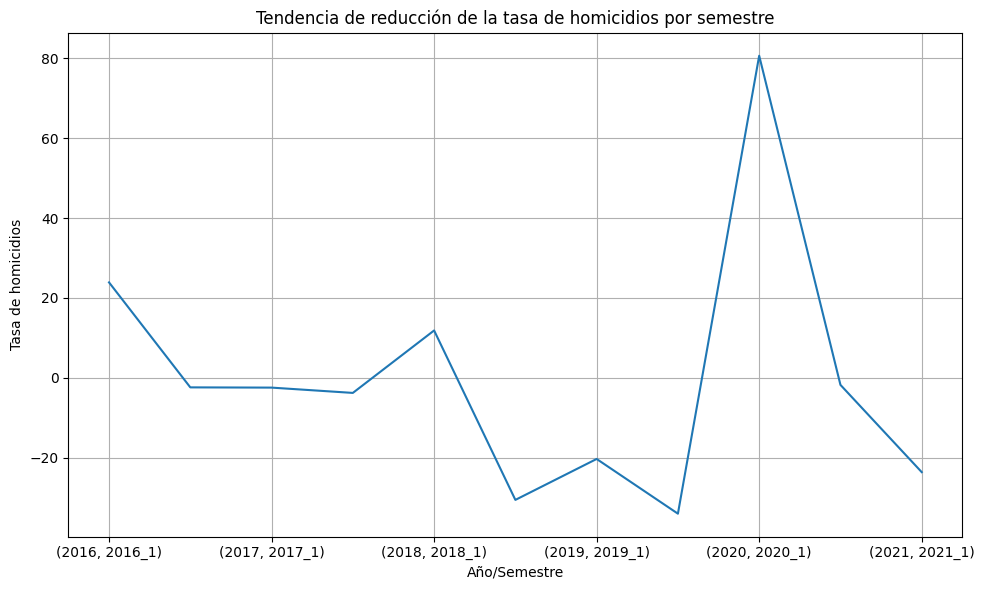

In [21]:
reduccion_tasa_homicidios.plot(figsize=(10,6))

plt.title('Tendencia de reducción de la tasa de homicidios por semestre')
plt.xlabel('Año/Semestre')
plt.ylabel('Tasa de homicidios')

plt.grid(True)
plt.tight_layout()
plt.show()

**KPI 1:** Reducción del 10% en la tasa de homicidios en siniestros viales en CABA en comparación con el semestre anterior

Este KPI se enfoca en medir la evolución de la tasa de homicidios en siniestros viales en la Ciudad Autónoma de Buenos Aires (CABA) en un período de varios años, comparando los dos últimos semestres. Análisis más detallado:

* **Tendencia general:** La tendencia en este KPI varía año tras año. En algunos años, se logra una disminución significativa, mientras que en otros se observa un aumento en la tasa de homicidios en siniestros viales.

* **Año 2020:** Se destaca un aumento significativo en la tasa de homicidios en el primer semestre (61.29%), pero una mejora en el segundo semestre (10%), lo que puede ser atribuible a factores específicos, como el impacto de la pandemia o medidas de seguridad vial.

* **Año 2021:** Los datos parecen estar incompletos, ya que falta información para el segundo semestre. Esto puede dificultar una evaluación precisa del rendimiento en ese año.

* **Comparación entre semestres:** En algunos casos, se logra la reducción deseada del 10% entre semestres, mientras que en otros no se alcanza.

* **Análisis de causas:** Sería útil profundizar en las razones detrás de las variaciones en la tasa de homicidios en siniestros viales, como cambios en las políticas de seguridad vial, mejoras en la infraestructura vial, o la influencia de eventos externos como la pandemia.

### KPI 2
**Objetivo:**
* Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

In [22]:
# Filtrar los datos para accidentes mortales de motociclistas
accidentes_motociclistas = homicidios_combinado[homicidios_combinado['VICTIMA'] == 'MOTO']

# Calcular la cantidad de accidentes mortales de motociclistas para cada año
accidentes_motociclistas_anio = accidentes_motociclistas.groupby('AAAA')['ID'].count()

# Calcular la reducción en la cantidad de accidentes mortales de motociclistas
reduccion_accidentes_motociclistas = ((accidentes_motociclistas_anio.shift(-1) - accidentes_motociclistas_anio) / accidentes_motociclistas_anio) * 100


In [24]:
reduccion_accidentes_motociclistas

AAAA
2016   -13.846154
2017     1.785714
2018   -12.280702
2019   -42.000000
2020    58.620690
2021          NaN
Name: ID, dtype: float64

In [26]:
accidentes_motociclistas_anio

AAAA
2016    65
2017    56
2018    57
2019    50
2020    29
2021    46
Name: ID, dtype: int64

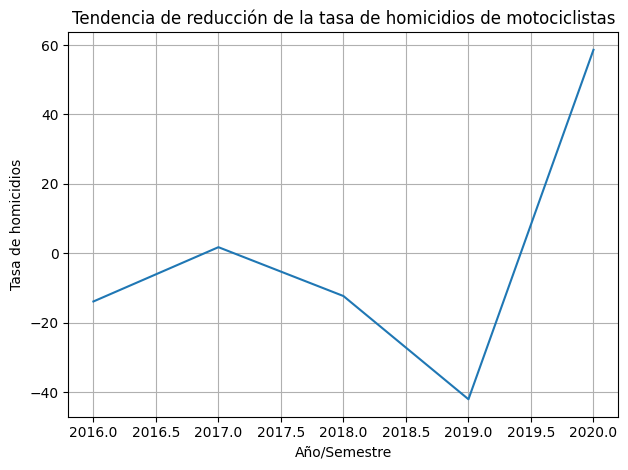

In [29]:
reduccion_accidentes_motociclistas.plot()

plt.title('Tendencia de reducción de la tasa de homicidios de motociclistas')
plt.xlabel('Año/Semestre')
plt.ylabel('Tasa de homicidios')

plt.grid(True)
plt.tight_layout()
plt.show()

**KPI 2:** Reducción del 7% en la cantidad de accidentes mortales de motociclistas en CABA en el último año en comparación con el año anterior

Este KPI se centra en evaluar la evolución de la cantidad de accidentes mortales de motociclistas en la Ciudad Autónoma de Buenos Aires (CABA) en un período de varios años, comparando los dos últimos años. Análisis más detallado:

* **Tendencia general:** En este KPI, también se observa una variación año tras año, con fluctuaciones tanto positivas como negativas.

* **Año 2020:** Destaca un aumento significativo del 58.62% en la cantidad de accidentes mortales de motociclistas, lo que podría requerir una atención inmediata para comprender las razones detrás de este aumento.

* **Año 2021:** Al igual que en el KPI 1, faltan datos para el año 2021 en este KPI, lo que dificulta una evaluación precisa.

* **Comparación anual:** La reducción del 7% en la cantidad de accidentes mortales de motociclistas es el objetivo, pero no siempre se logra. Por ejemplo, en el año 2019, se observa una disminución significativa del 42%.

* **Análisis de causas:** Para entender las fluctuaciones en este KPI, sería importante analizar factores como las medidas de seguridad específicas para motociclistas, el aumento en la cantidad de motociclistas en la ciudad y la aplicación de políticas de tráfico.